# Effective Variables on Loan Characteristics
## Based on Loan Data from Prosper
## by Ali Rafieh

## Investigation Overview

In this investigation I looked forward of common intuition items and features which people thinks have most effect on their loan's amount or rate. I tried to figure out the relation between these items in loan data from Prosper. Most exploratory process has done by different graphs. I selected 11 properties (variables) from original dataset and concentrate on them. These variables are: 'Term', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'InquiriesLast6Months', 'TotalInquiries', 'IncomeRange' and 'LoanOriginalAmount'.

## Dataset Overview

The dataset contain 81 properties (variables) for 113937 loan data. After selecting data, a new column, 'CreditScoreLevels', based on Experian credit score levels, created and input data provided by mean value of 'CreditScoreRangeLower' and 'CreditScoreRangeUpper' for each record. The levels are: 'Very Poor', ‘Fair’, 'Good', 'Very Good' and 'Exceptional'.
After cleaning dataset, 8560 records removed.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('loan_select_data.csv')

In [3]:
# convert CreditScoreLevels and  IncomeRange into ordered categorical types
credit_bins_name = ['Very Poor',  'Fair', 'Good', 'Very Good', 'Exceptional']
credit_level = pd.api.types.CategoricalDtype(ordered = True, categories = credit_bins_name )
df['CreditScoreLevels'] = df['CreditScoreLevels'].astype(credit_level)

income_order = ['Not employed','$1-24,999', '$25,000-49,999', '$50,000-74,999',
                '$75,000-99,999','$100,000+']
income_level = pd.api.types.CategoricalDtype(ordered = True, categories = income_order )
df['IncomeRange'] = df['IncomeRange'].astype(income_level)

## BorroweRate and BorrowerAPR  Distributaion

The descriptions BorrowerAPR and BorrowerRate, respectively, is:
The Borrower's Annual Percentage Rate (APR) for the loan and the Borrower's interest rate for this loan. Distribution shows how these two are similar together. They mainly cover each other, with a little BorrowerAPR  step ahead.

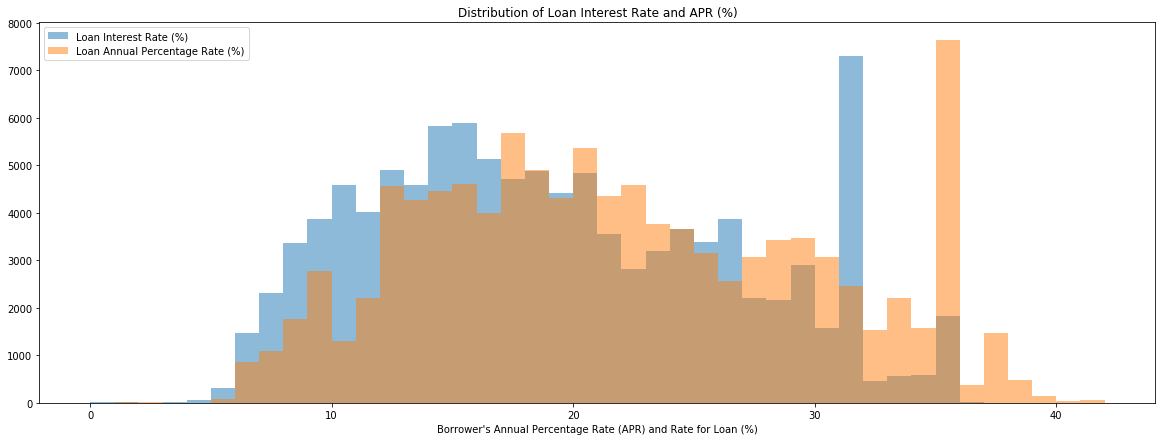

In [5]:
plt.figure(figsize = [20,7])

bins = np.arange(min(df.BorrowerRate), max(df.BorrowerAPR)+0.1, 1)
plt.hist(data = df, x = 'BorrowerRate', alpha = 1/2, bins = bins)
plt.hist(data = df, x = 'BorrowerAPR', alpha = 1/2, bins = bins)
labels= ['Loan Interest Rate (%)', 'Loan Annual Percentage Rate (%)']
plt.title('Distribution of Loan Interest Rate and APR (%)')
# plt.xlabel("Borrower's Annual Percentage Rate (APR) and Rate for Loan (%)")
plt.legend(labels);

## Frequency Distributions

 Following frequency distributions of six main dataset variables, can provide a snapshot picture of dataset, and maximum and minimum of each variables. Loan amount, plotted on a logarithmic scale and follow a normal distribution. There is one peak around $ 5k and second one, shorter but wider, from $ 8k to $ 18k. Credit score has a normal distribution. Borrower who are homeowner are 51.7 percent so close to non-homeowner.

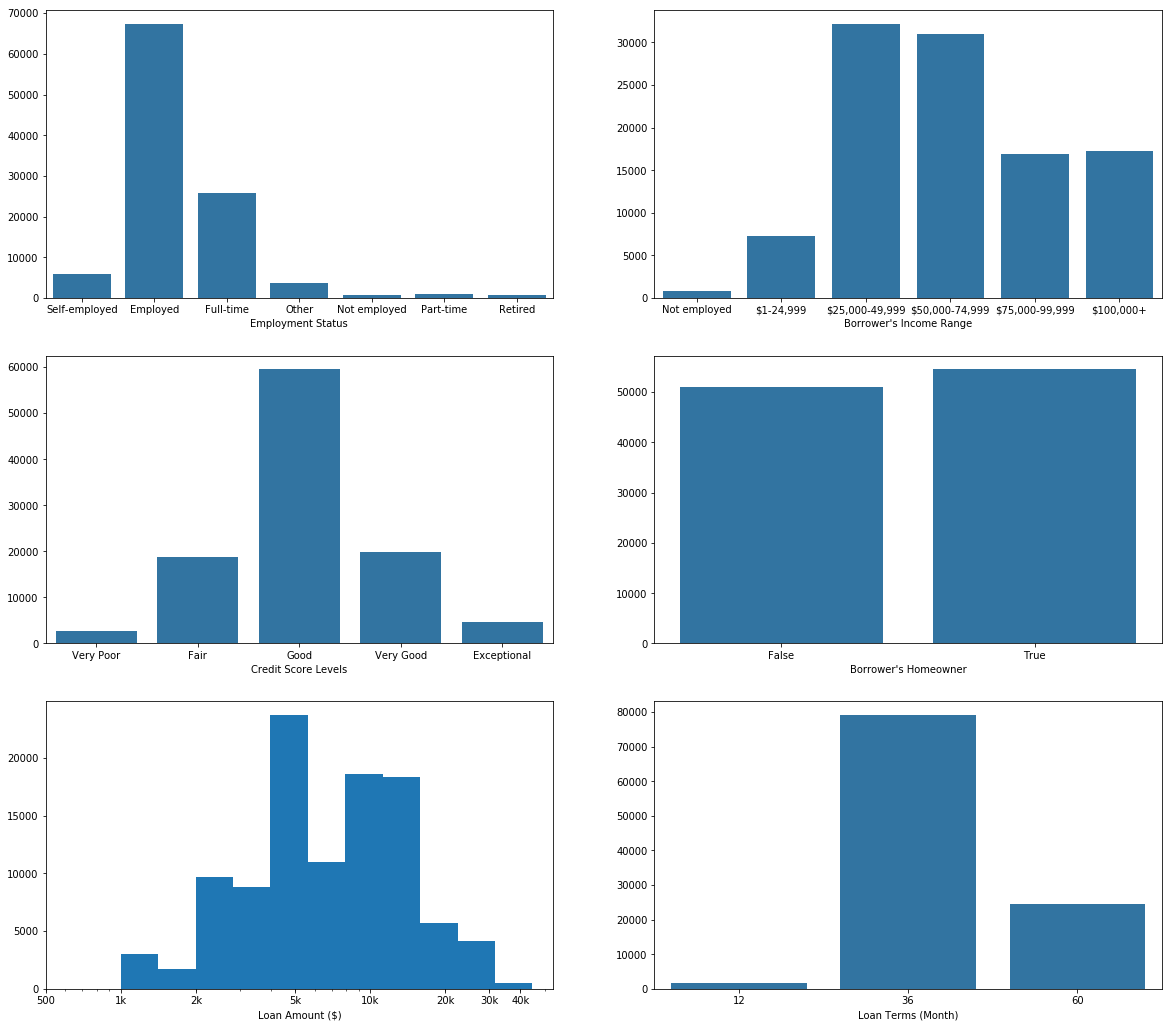

In [12]:
plt.figure(figsize = [20, 18])

base_color = sb.color_palette()[0]

ax = plt.subplot(3, 2, 1)
sb.countplot(data = df, x = 'EmploymentStatus', color = base_color)
plt.xlabel('Employment Status')
plt.ylabel('');

ax = plt.subplot(3, 2, 2)
sb.countplot(data = df, x = 'IncomeRange', color = base_color);
plt.xlabel("Borrower's Income Range")
# plt.xticks(rotation = 3);
plt.ylabel('');

ax = plt.subplot(3, 2, 3)
sb.countplot(data = df, x = 'CreditScoreLevels', color = base_color);
plt.xlabel('Credit Score Levels')
plt.ylabel('');

ax = plt.subplot(3, 2, 4)
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color);
plt.xlabel("Borrower's Homeowner")
plt.ylabel('');

ax = plt.subplot(3, 2, 5)
log_binsize = 0.15
bins = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4, 4e4], [500, '1k', '2k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('Loan Amount ($)');

ax = plt.subplot(3, 2, 6)
sb.countplot(data = df, x = 'Term', color = base_color)
plt.xlabel('Loan Terms (Month)')
plt.ylabel('');

## Credit Score vs. Main Loan Characteristics

Credit Score in one of the most important variables in loan properties, as shown in graphs. Credit score has inverse relation with borrower's loan's rate and APR, that means as credit score goes higher, rate and APR go down. In other side, credit score has direct relation with loan amount, higher loan amount goes to greater credit score.

Credit score has inverse relation with both inquiries, but sensitivity of credit score to inquiries after 'Very Poor' score, sharply fade and in 'Good', 'Very Good' and 'Exceptional' scores, has little change vs. number of inquiries on both, total and last 6 months.

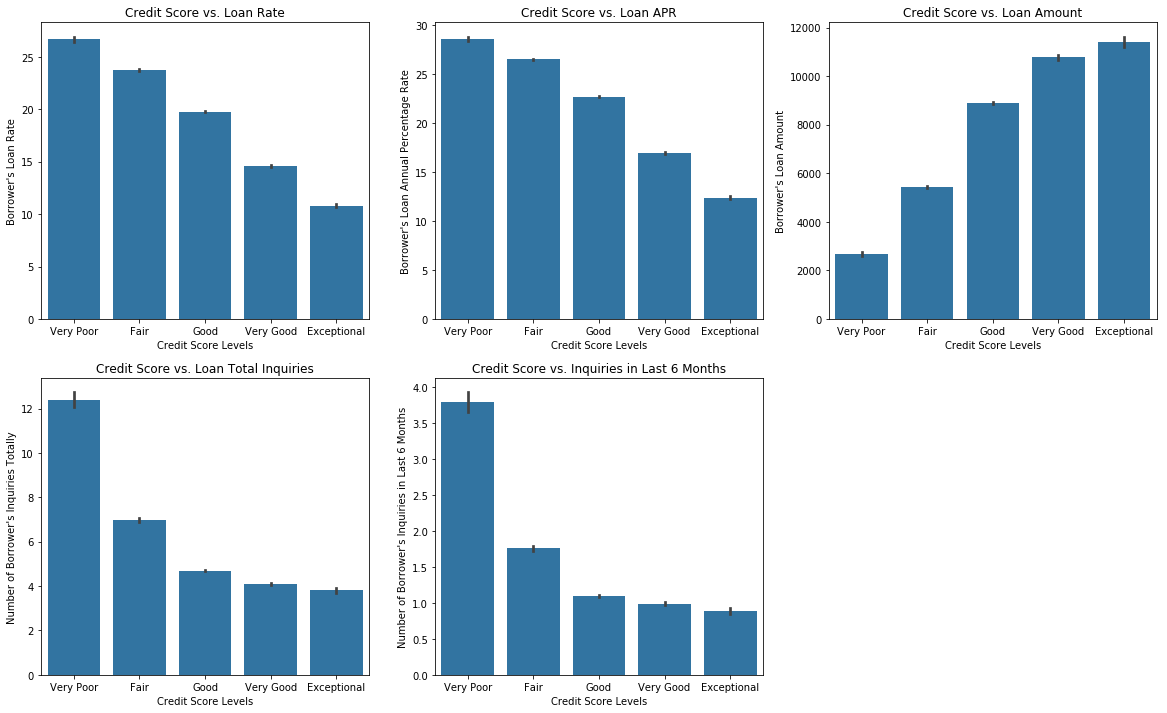

In [52]:
plt.figure(figsize = [20, 12])

plt.subplot(2,3,1)
sb.barplot(data = df, x = 'CreditScoreLevels', y = 'BorrowerRate', color = base_color)
plt.xlabel('Credit Score Levels')
plt.ylabel("Borrower's Loan Rate");
plt.title('Credit Score vs. Loan Rate')

plt.subplot(2,3,2)
sb.barplot(data = df, x = 'CreditScoreLevels', y = 'BorrowerAPR', color = base_color)
plt.xlabel('Credit Score Levels')
plt.ylabel("Borrower's Loan Annual Percentage Rate");
plt.title('Credit Score vs. Loan APR')

plt.subplot(2,3,3)
sb.barplot(data = df, x = 'CreditScoreLevels', y = 'LoanOriginalAmount', color = base_color);
plt.xlabel('Credit Score Levels')
plt.ylabel("Borrower's Loan Amount");
plt.title('Credit Score vs. Loan Amount')

plt.subplot(2,3,4)
sb.barplot(data = df, x = 'CreditScoreLevels', y = 'TotalInquiries', color = base_color);
plt.xlabel('Credit Score Levels')
plt.ylabel("Number of Borrower's Inquiries Totally");
plt.title('Credit Score vs. Loan Total Inquiries')

plt.subplot(2,3,5)
sb.barplot(data = df, x = 'CreditScoreLevels', y = 'InquiriesLast6Months', color = base_color);
plt.xlabel('Credit Score Levels')
plt.ylabel("Number of Borrower's Inquiries in Last 6 Months")
plt.title('Credit Score vs. Inquiries in Last 6 Months');

## Loan's Rate and APR vs. Loan Amount

These two highly correlated variables, 'BorrowerRate' and 'BorrowerAPR', have inversere relation with 'LoanOriginalAmount' variable.
Both loan's rate and loan's APR has similar behevior with 'LoanOriginalAmount', but in some distance: clearly APR stands higher than Rate. Both have descending trend and generally we can say with increasing loan amount, both loan's rate and APR decrease.

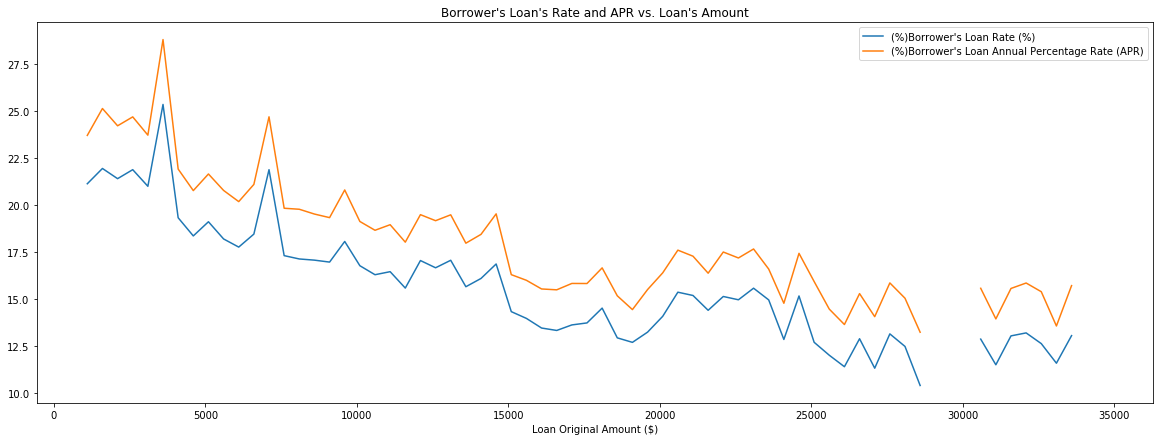

In [23]:
bins_e = np.arange(min(df.LoanOriginalAmount), max(df.LoanOriginalAmount)+100, 500)
bins_c = bins_e[:-1] + 100

loan_binned = pd.cut(df['LoanOriginalAmount'], bins_e, include_lowest = True)
rate_mean = df['BorrowerRate'].groupby(loan_binned).mean()
apr_mean = df['BorrowerAPR'].groupby(loan_binned).mean()

plt.figure(figsize = [20,7])
plt.errorbar(x = bins_c, y = rate_mean, label = "(%)Borrower's Loan Rate (%)")
plt.errorbar(x = bins_c, y = apr_mean, label = "(%)Borrower's Loan Annual Percentage Rate (APR)")
plt.xlabel('Loan Original Amount ($)')
plt.legend()
plt.title("Borrower's Loan's Rate and APR vs. Loan's Amount");

## Effect of Employment Status, Income Range and Being Homeowner on Loan' Rate and Amount

Here as we expected, income range and being a homeowner, shows little effect on loan's rate and amount that means higher income range could get higher loan's amount with lower rate. But the situation for employment status, for different categories, is little different, maybe for overlapping in categories, but 'Not employed' status has higher rate and 'Employed' category got higher loan's amount.

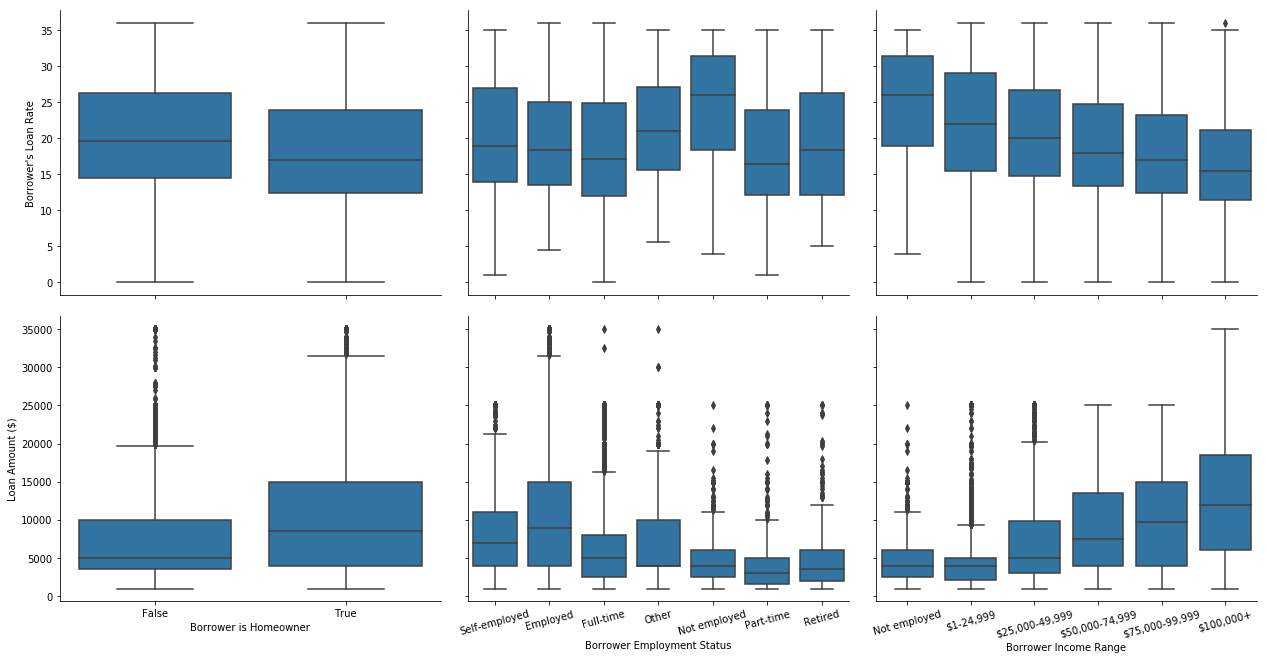

In [20]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

g = sb.PairGrid(data = df, y_vars = ['BorrowerRate', 'LoanOriginalAmount'], 
                x_vars = ['IsBorrowerHomeowner','EmploymentStatus', 'IncomeRange'], height = 4.5, aspect = 1.3);
g.map(boxgrid);
for ax in g.axes.flat[4:]:
    for label in ax.get_xticklabels():
        label.set_rotation(15)

g.axes[1,0].xaxis.set_label_text('Borrower is Homeowner')
g.axes[1,1].xaxis.set_label_text('Borrower Employment Status')
g.axes[1,2].xaxis.set_label_text('Borrower Income Range')
g.axes[1,0].yaxis.set_label_text('Loan Amount ($)')
g.axes[0,0].yaxis.set_label_text("Borrower's Loan Rate")

plt.show();

## Credit Scores by Loan's Rate and Amount

As I expected, higher `CreditScoreLevels` could take bigger loan's amount with lower rate, this trend specially obvious with lower rate, beside of amount, most down area of scatter plot, fill with `'Very Good'` and `'Exceptional'` scores. 

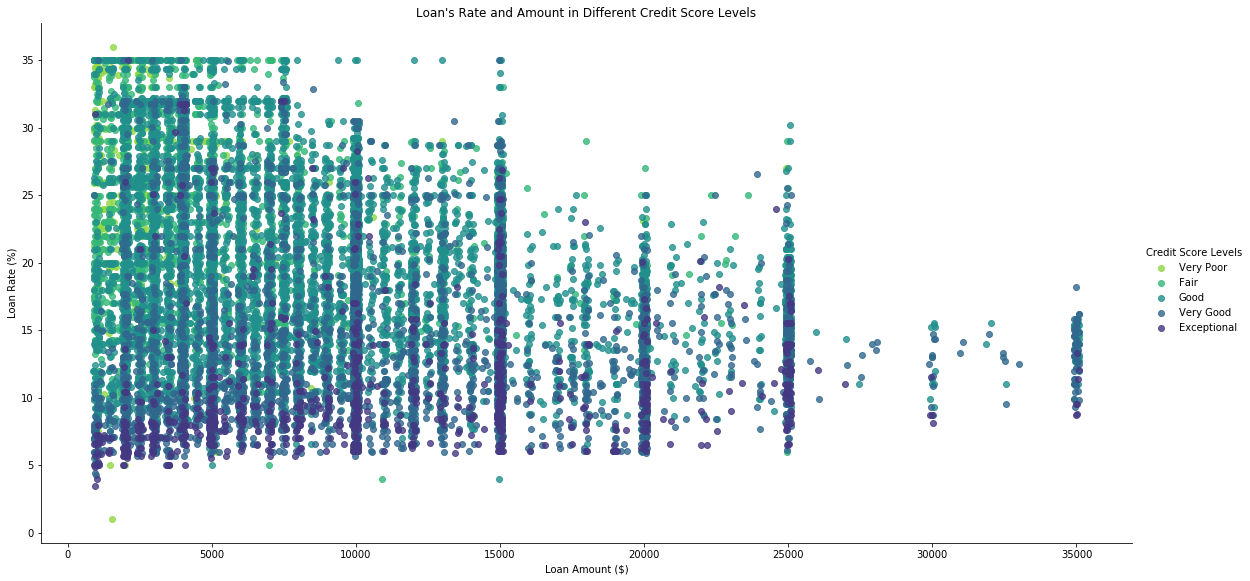

In [29]:
samples = np.random.choice(df.shape[0], 20000, replace = False)
loan_samp = df.loc[samples,:]

g = sb.FacetGrid(data = loan_samp, hue =  'CreditScoreLevels',
               height = 8, aspect = 2, palette = 'viridis_r')
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter = 100, fit_reg = False)
g.add_legend(title='Credit Score Levels')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Rate (%)')
plt.title("Loan's Rate and Amount in Different Credit Score Levels");

## How Loan's Rate and Amount Affected by Income Range in Different Credit Score Levels

I expected in all levels of ‘Credit Score Levels', borrowers with 'Not employed' value in 'Income Range' have higher loan's rate and lower loan's amount. As following plots show, this trend has been followed by different credit score levels but 'Very Poor'. In this level, interestingly, 'Not employed' borrowers got higher loan's amount with lower loan's rate rather than of the rest levels. Beside this note, rest of graph comply our intuition expectation: higher 'Income Range' in all 'Credit Score Levels' could take higher loan's amount with lower loan's rate.

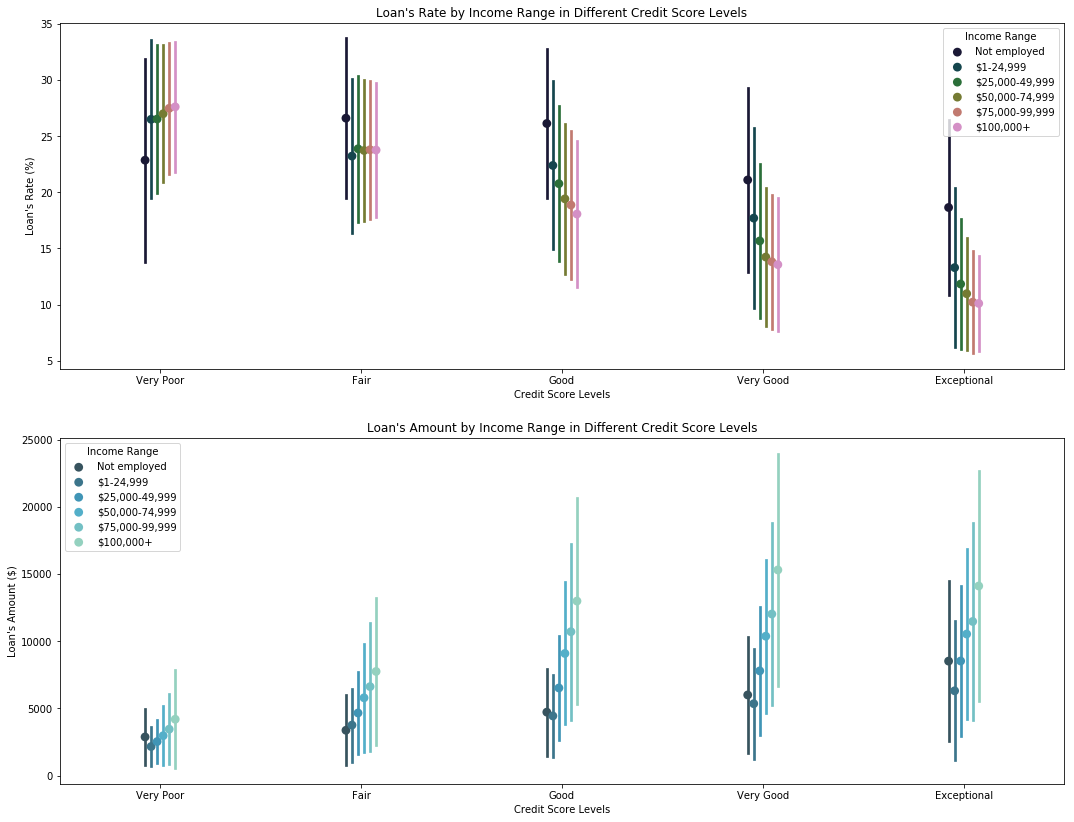

In [30]:
plt.figure(figsize = [18,14])

plt.subplot(2,1,1)
sb.pointplot(data = df, x='CreditScoreLevels', y = 'BorrowerRate', hue = 'IncomeRange',
             palette = sb.color_palette("cubehelix", 8), ci = 'sd', linestyles = "", dodge = True)
plt.ylabel("Loan's Rate (%)")
plt.xlabel('Credit Score Levels')
plt.legend(title = 'Income Range')
plt.title("Loan's Rate by Income Range in Different Credit Score Levels");

plt.subplot(2,1,2)
sb.pointplot(data = df, x='CreditScoreLevels', y = 'LoanOriginalAmount', hue = 'IncomeRange',
             palette = sb.color_palette("GnBu_d"), ci = 'sd', linestyles = "", dodge = True)
plt.ylabel("Loan's Amount ($)")
plt.xlabel('Credit Score Levels')
plt.legend(title = 'Income Range')
plt.title("Loan's Amount by Income Range in Different Credit Score Levels");

## Different Loan's Term by Loan's Rate, Amount and Different Credit Score Levels

As we saw in loan's terms frequency plot, 36 months term is most popular term in our dataset. But, this popularity is most related to loan's rate and loan's amount rather than borrowers credit score or other borrower's characteristics. In different credit score levels, higher loan’s amount or loan’s rate goes to 60 months loan’s term and 36 & 12 months are with lower loan’s rate and amount. 


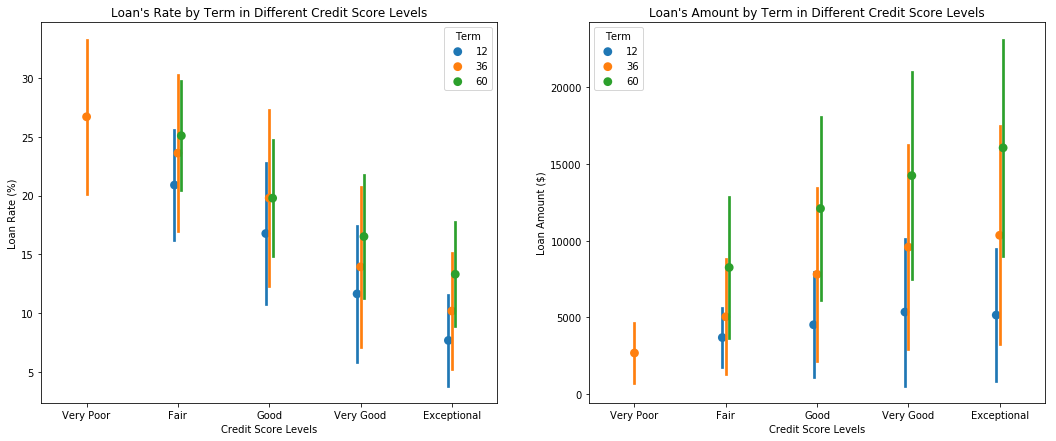

In [35]:
plt.figure(figsize = [18,7])

plt.subplot(1,2,1)
sb.pointplot(data = df, x='CreditScoreLevels', y = 'BorrowerRate', hue = 'Term',
             ci = 'sd', linestyles = "", dodge = True)
plt.ylabel('Loan Rate (%)')
plt.xlabel('Credit Score Levels')
plt.title("Loan's Rate by Term in Different Credit Score Levels");

plt.subplot(1,2,2)
sb.pointplot(data = df, x='CreditScoreLevels', y = 'LoanOriginalAmount', hue = 'Term',
             ci = 'sd', linestyles = "", dodge = True)
plt.ylabel('Loan Amount ($)')
plt.xlabel('Credit Score Levels')
plt.title("Loan's Amount by Term in Different Credit Score Levels");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!